In [79]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
path = '/content/Franchises Dataset.xlsx'
df = pd.read_excel(path)
df.head()

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type,Location
0,2.0,8.4,7.7,101,Café,Vancouver
1,1.3,3.3,4.5,59,Café,Vancouver
2,1.2,5.8,8.4,103,Pizza Store,Richmond
3,2.4,10.0,7.8,106,Burger store,Richmond
4,0.7,4.7,2.4,80,Café,Richmond


In [81]:
df.isnull().sum()

Net Profit             0
Counter Sales          0
Drive-through Sales    0
number of customers    0
Business Type          0
Location               0
dtype: int64

In [82]:
df.shape

(100, 6)

## getting the unique values and performing label encoding

In [83]:

df['Business Type'].value_counts()

Burger store    39
Café            33
Pizza Store     28
Name: Business Type, dtype: int64

In [84]:
df['Location '].value_counts()

Vancouver    96
Richmond      4
Name: Location , dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label = LabelEncoder()

# Apply label encoding on the 'Category' column
df['Business Type_encoded'] = label.fit_transform(df['Business Type'])
df['Location_encoded'] = label.fit_transform(df['Location '])
df = df.drop(['Business Type','Location '], axis=1)


In [86]:
df.head()

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type_encoded,Location_encoded
0,2.0,8.4,7.7,101,1,1
1,1.3,3.3,4.5,59,1,1
2,1.2,5.8,8.4,103,2,0
3,2.4,10.0,7.8,106,0,0
4,0.7,4.7,2.4,80,1,0


## decision tree model and calculate its accuracy:

In [87]:
df.columns

Index(['Net Profit', 'Counter Sales', 'Drive-through Sales',
       'number of customers', 'Business Type_encoded', 'Location_encoded'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [89]:
# define x and y
X = df.drop(['Net Profit'], axis=1)
y = df['Net Profit']

X.head()

,Counter Sales,Drive-through Sales,number of customers,Business Type_encoded,Location_encoded
0,8.4,7.7,101,1,1
1,3.3,4.5,59,1,1
2,5.8,8.4,103,2,0
3,10.0,7.8,106,0,0
4,4.7,2.4,80,1,0


## BUILDING THE MODEL

In [90]:
from sklearn.tree import DecisionTreeRegressor
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the decision tree model
model = DecisionTreeRegressor()

In [91]:
model.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = model.predict(X_test)

In [92]:
model.score(X_test, y_test)


0.971395881006865

To simulate and visualize the decision tree, you can use the graphviz library


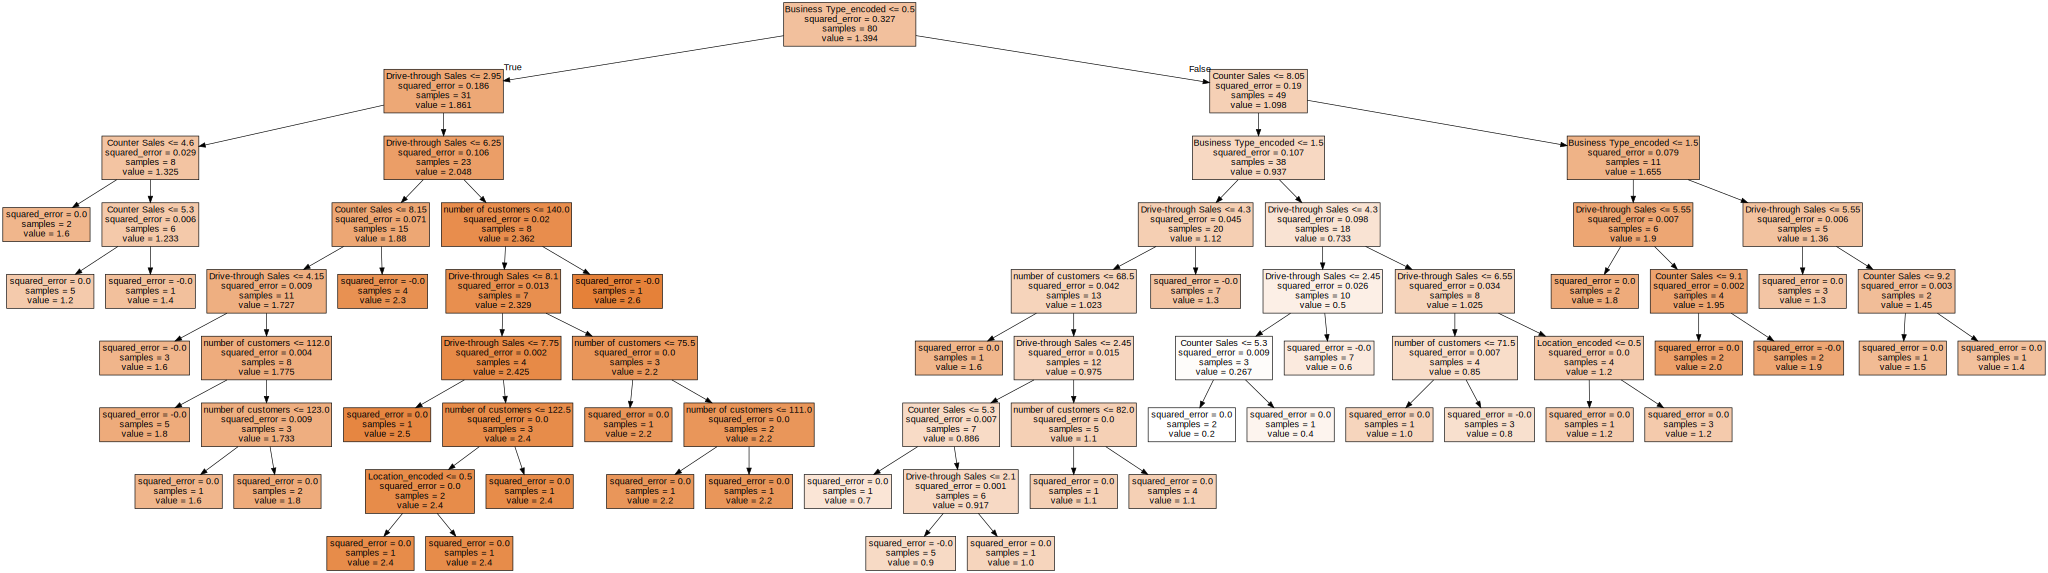

In [93]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")


## RANDOM FOREST

In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [95]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=70, random_state=42)
# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=70, random_state=42)

In [96]:
# Make predictions using the trained model
y_pred = rf_model.predict(X_test)

# Calculate mean squared error and coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Coefficient of Determination (R^2):', r_squared)


Mean Squared Error: 0.013552551020408195
Coefficient of Determination (R^2): 0.9612341217951711


## RETRAIN THE MODEL

In [97]:
# Initialize the Random Forest model
rf_model2 = RandomForestRegressor(n_estimators=70, max_depth=5, min_samples_leaf=5, random_state=42)

# Train the model using the training data
rf_model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=70,
                      random_state=42)

In [98]:
# Make predictions using the trained model
y_pred1 = rf_model2.predict(X_test)

# Calculate mean squared error and coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred1)
r_squared = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Coefficient of Determination (R^2):', r_squared)


Mean Squared Error: 0.050671066310512915
Coefficient of Determination (R^2): 0.9612341217951711


## visualise

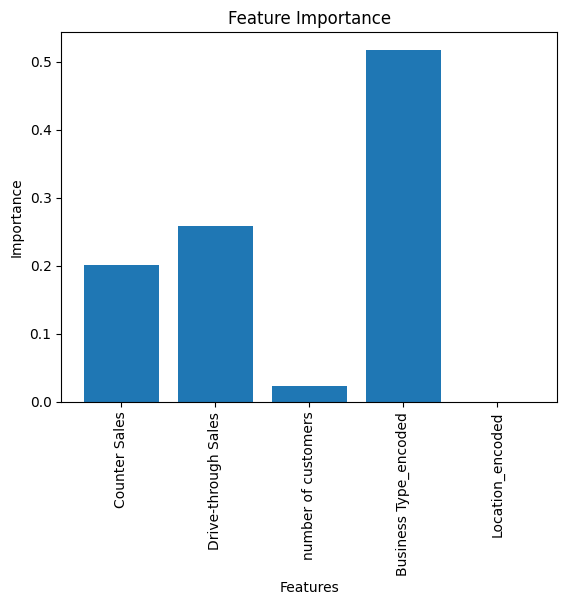

In [99]:

# Step 5: Visualizing the feature importances
feature_importances = rf_model.feature_importances_
# Creating a bar plot to visualize the feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()


In [100]:
df.head()

,Net Profit,Counter Sales,Drive-through Sales,number of customers,Business Type_encoded,Location_encoded
0,2.0,8.4,7.7,101,1,1
1,1.3,3.3,4.5,59,1,1
2,1.2,5.8,8.4,103,2,0
3,2.4,10.0,7.8,106,0,0
4,0.7,4.7,2.4,80,1,0


## What is the forecast of the net profit, if the counter sales are 500,000 $, drive-through
#sales are 700,000$, and the franchise is a pizza store located in Richmond, using both
#models (Decision Tree and Random Forest). Comment on the forecasted value.

In [101]:
# Input test data for Decision Tree
x_test_dt = np.array([500000, 700000, 0, 0, 1], dtype=object)
x_test_dt = x_test_dt.reshape(1, -1)

# Make prediction using Decision Tree model
y_pred_dt = model.predict(x_test_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [102]:
y_pred_dt

array([2.2])

In [103]:
# Input test data for RANDOM FOREST
x_test_dt = np.array([500000, 700000, 0, 0, 1], dtype=object)
x_test_dt = x_test_dt.reshape(1, -1)

# Make prediction using Decision Tree model
y_pred_RF = rf_model.predict(x_test_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [104]:
y_pred_RF

array([2.35428571])

## saving the clean dataset , the reference file

In [105]:
df.to_csv('REFERENCE_EXCEL.csv', index=False)
